# Test noise simulation methods

In [7]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

%matplotlib inline

if os.getcwd().split('/')[-1] == "notebooks":
    %cd ..

# Import noise simulator
from scripts.noise_simulation import NoiseConfiguration, NoiseSimulator, NoiseType
from scripts.utils import read_dcm


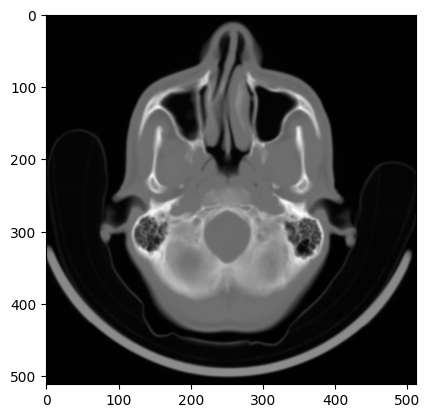

In [8]:
img_path = 'data/RSNA_BME548/images/ID_00a0b0e52.dcm'
image =  read_dcm(img_path)

# Convert to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# show original image
plt.imshow(grayscale_image)

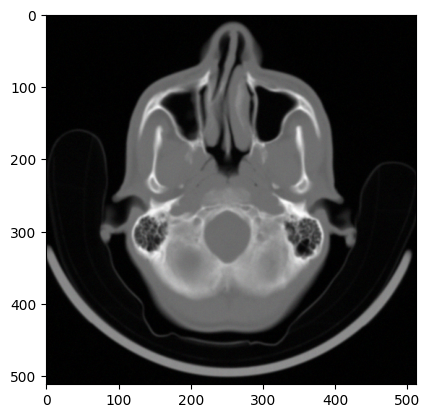

In [9]:
# noise_types, noise_levels, train_noise_ratio, val_noise_ratio, test_noise_ratio
simulation_config = NoiseConfiguration([NoiseType.GAUSSIAN], [0.01])
noisy_img = NoiseSimulator.apply_noise(grayscale_image, simulation_config)

# show noisy image
plt.imshow(noisy_img)